Mestrado em Modelagem Matematica da Informacao
----------------------------------------------
Disciplina: Modelagem e Mineracao de Dados
------------------------------------------

Master Program - Mathematical Modeling of Information
-----------------------------------------------------
Course: Data Mining and Modeling
--------------------------------

Professor: Renato Rocha Souza
-----------------------------  

Introduction to Data Mining  
--------------------------------------------
Comparing Weka and Python for the same tasks  
http://www.reddit.com/r/MachineLearning/comments/1rwj8p/why_are_python_r_so_much_more_popular_here_than/
____________________________________________

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import scipy.stats as ss
from scipy.io.arff import loadarff
import os

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
datapath = "/home/rsouza/Dropbox/Renato/ModMinDados/Git/datasets/"
outputs = "/home/rsouza/Dropbox/Renato/ModMinDados/outputs/"

In [4]:
dataset1 = "bank.arff"
dataset2 = "zoo.arff"
dataset3 = "weather.nominal.arff"
dataset4 = "vote.arff"
dataset5 = ""

#### Explorando os dados: Bank.arff

In [5]:
bank = loadarff(os.path.join(datapath,dataset1))
df_bank = pd.DataFrame(bank[0])

In [6]:
df_bank.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48.0,b'FEMALE',b'INNER_CITY',17546.0,b'NO',b'1',b'NO',b'NO',b'NO',b'NO',b'YES'
1,40.0,b'MALE',b'TOWN',30085.1,b'YES',b'3',b'YES',b'NO',b'YES',b'YES',b'NO'
2,51.0,b'FEMALE',b'INNER_CITY',16575.4,b'YES',b'0',b'YES',b'YES',b'YES',b'NO',b'NO'
3,23.0,b'FEMALE',b'TOWN',20375.4,b'YES',b'3',b'NO',b'NO',b'YES',b'NO',b'NO'
4,57.0,b'FEMALE',b'RURAL',50576.3,b'YES',b'0',b'NO',b'YES',b'NO',b'NO',b'NO'


In [7]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
age            600 non-null float64
sex            600 non-null object
region         600 non-null object
income         600 non-null float64
married        600 non-null object
children       600 non-null object
car            600 non-null object
save_act       600 non-null object
current_act    600 non-null object
mortgage       600 non-null object
pep            600 non-null object
dtypes: float64(2), object(9)
memory usage: 51.6+ KB


In [8]:
df_bank.columns

Index(['age', 'sex', 'region', 'income', 'married', 'children', 'car',
       'save_act', 'current_act', 'mortgage', 'pep'],
      dtype='object')

In [9]:
features = set(df_bank.columns)
features -= set(['age','income']) # retiro os valores numéricos
features

{'car',
 'children',
 'current_act',
 'married',
 'mortgage',
 'pep',
 'region',
 'save_act',
 'sex'}

In [10]:
for feature in features:
    print(u'Feature {} possui os valores únicos: {}'.format(feature, df_bank[feature].unique()))

Feature sex possui os valores únicos: [b'FEMALE' b'MALE']
Feature save_act possui os valores únicos: [b'NO' b'YES']
Feature current_act possui os valores únicos: [b'NO' b'YES']
Feature region possui os valores únicos: [b'INNER_CITY' b'TOWN' b'RURAL' b'SUBURBAN']
Feature children possui os valores únicos: [b'1' b'3' b'0' b'2']
Feature married possui os valores únicos: [b'NO' b'YES']
Feature mortgage possui os valores únicos: [b'NO' b'YES']
Feature car possui os valores únicos: [b'NO' b'YES']
Feature pep possui os valores únicos: [b'YES' b'NO']


#### Discretizando os dados

http://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas

In [11]:
df_bank2 = df_bank.copy()

df_bank2.children = df_bank.children.map(int)
df_bank2.age = df_bank.age.map(int)

d1 = {'YES': True, 'NO': False}
df_bank2['married'] = df_bank['married'].map(d1)
df_bank2['save_act'] = df_bank['save_act'].map(d1)
df_bank2['current_act'] = df_bank['current_act'].map(d1)
df_bank2['mortgage'] = df_bank['mortgage'].map(d1)
df_bank2['pep'] = df_bank['pep'].map(d1)
df_bank2['car'] = df_bank['car'].map(d1)

d2 = {'FEMALE':1, 'MALE':0}
df_bank2['sex'] = df_bank['sex'].map(d2)

d3 = {'INNER_CITY':0, 'TOWN':1, 'SUBURBAN':2, 'RURAL':3}
df_bank2['region'] = df_bank['region'].map(d3)

In [12]:
df_bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
age            600 non-null int64
sex            0 non-null float64
region         0 non-null float64
income         600 non-null float64
married        0 non-null object
children       600 non-null int64
car            0 non-null object
save_act       0 non-null object
current_act    0 non-null object
mortgage       0 non-null object
pep            0 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 51.6+ KB


In [13]:
df_bank2.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,NaN,NaN,17546.0,NaN,1,NaN,NaN,NaN,NaN,NaN
1,40,NaN,NaN,30085.1,NaN,3,NaN,NaN,NaN,NaN,NaN
2,51,NaN,NaN,16575.4,NaN,0,NaN,NaN,NaN,NaN,NaN
3,23,NaN,NaN,20375.4,NaN,3,NaN,NaN,NaN,NaN,NaN
4,57,NaN,NaN,50576.3,NaN,0,NaN,NaN,NaN,NaN,NaN


In [14]:
byPEP = df_bank2.groupby(['pep'])
byPEP.describe()

""


In [15]:
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == True)].describe()

,age,sex,region,income,children
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


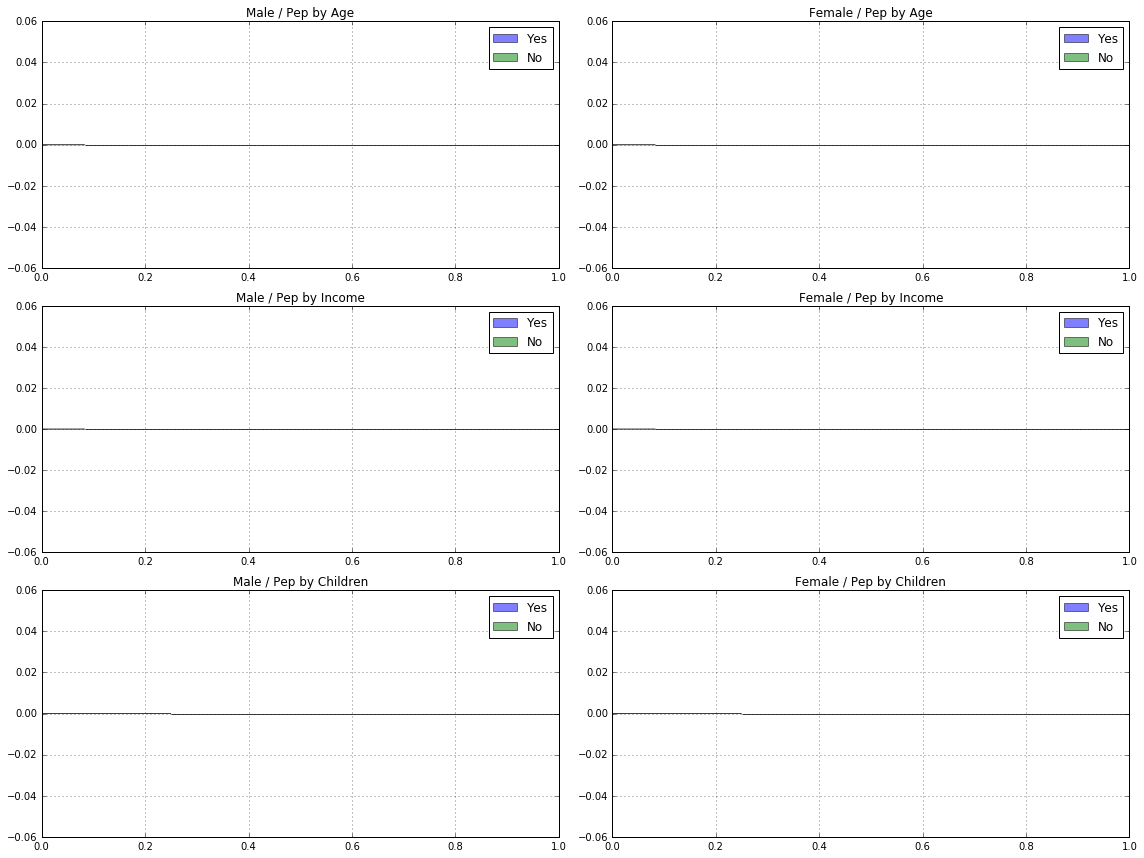

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,12))

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == True)]['age'].hist(ax=axes[0,0], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == False)]['age'].hist(ax=axes[0,0], bins=12, alpha=0.5, label='No')
axes[0,0].set_title('Male / Pep by Age')
axes[0,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == True)]['age'].hist(ax=axes[0,1], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == False)]['age'].hist(ax=axes[0,1], bins=12, alpha=0.5, label='No')
axes[0,1].set_title('Female / Pep by Age')
axes[0,1].legend()

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == True)]['income'].hist(ax=axes[1,0], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == False)]['income'].hist(ax=axes[1,0], bins=12, alpha=0.5, label='No')
axes[1,0].set_title('Male / Pep by Income')
axes[1,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == True)]['income'].hist(ax=axes[1,1], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == False)]['income'].hist(ax=axes[1,1], bins=12, alpha=0.5, label='No')
axes[1,1].set_title('Female / Pep by Income')
axes[1,1].legend()

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == True)]['children'].hist(ax=axes[2,0], bins=4, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == False)]['children'].hist(ax=axes[2,0], bins=4, alpha=0.5, label='No')
axes[2,0].set_title('Male / Pep by Children')
axes[2,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == True)]['children'].hist(ax=axes[2,1], bins=4, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == False)]['children'].hist(ax=axes[2,1], bins=4, alpha=0.5, label='No')
axes[2,1].set_title('Female / Pep by Children')
axes[2,1].legend()

fig.tight_layout()

#### Construindo uma árvore de decisão:

http://scikit-learn.org/stable/modules/tree.html  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier  
http://stackoverflow.com/questions/18753709/how-to-make-sense-the-output-of-decisiontreeclassifier-in-scikit-learn  
http://stackoverflow.com/questions/23557545/how-to-explain-the-decision-tree-from-scikit-learn  
https://github.com/paulgb/sklearn-pandas  

In [18]:
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image #needed to render in notebook
import pydot  #Install http://www.graphviz.org/ & https://pypi.python.org/pypi/pydot2/1.0.32 pydot --> pip install pydot2

Couldn't import dot_parser, loading of dot files will not be possible.


In [19]:
#clf = tree.DecisionTreeClassifier(criterion='entropy', max_features="auto", min_samples_leaf=10)
clf = tree.DecisionTreeClassifier(criterion='gini', max_features="auto", min_samples_leaf=15)
features_list=['age', 'sex', 'region', 'income', 'married', 'children', 'car', 'save_act', 'current_act', 'mortgage']
clf.fit(df_bank2[features_list], df_bank2.pep)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
clf.feature_importances_

In [ ]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features_list) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
with open("bank_pep.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=features_list)
#Chamando um programa externo ao Ipython com o operador !
!dot -Tpng bank_pep.dot -o bank_pep.png
Image("bank_pep.png")

A partir de nossa árvore treinada, podemos classificar novos elementos:

In [ ]:
#df_bank[features_list][0:5]
df_bank[0:5]

In [ ]:
#clf.predict(df_bank2[features_list].ix[1])
clf.predict([40,0,1,17000.0,True,1,True,False,True,True])

#### Visualizando a superfície de decisão

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 2
plot_colors = "by"
plot_step = 0.02
outcome = ['False','True']

for pairidx, pair in enumerate([['sex','region'], ['sex', 'car'], ['sex', 'children'],
                                ['region', 'car'], ['region', 'children'], ['car', 'children']]):
    # We only take the two corresponding features
    X = df_bank2[pair].values
    y = df_bank2.pep

    # Shuffle
    #idx = np.arange(X.shape[0])
    #np.random.seed(13)
    #np.random.shuffle(idx)
    #X = X[idx]
    #y = y[idx]

    # Standardize
    #mean = X.mean(axis=0)
    #std = X.std(axis=0)
    #X = (X - mean) / std

    # Train
    clf2 = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[:, 0], X[:, 1], c=color, label=outcome[i], cmap=plt.cm.Paired)
    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.legend()
plt.show()

#### Aplicando K-Means

Seguindo o exemplo: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html  

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]

X = df_bank2[['age','income','region']].values

estimators = {'k_means_3': KMeans(n_clusters=3),
              'k_means_8': KMeans(n_clusters=8),
              'k_means_bad_init': KMeans(n_clusters=3, n_init=1, init='random')}

In [ ]:
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(8,8))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float))
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('Income')
    ax.set_zlabel('Region')
    ax.set_label(name)
    fignum = fignum + 1

In [ ]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=100)

plt.cla()

X = df_bank2[['age','income','region']].values
y = df_bank2.pep

for name, label in [('PEP', True),('No PEP', False)]:
    ax.text3D(X[y == label, 2].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 0].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, ['b','g'])
ax.scatter(X[:, 2], X[:, 1], X[:, 0], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Region')
ax.set_ylabel('Income')
ax.set_zlabel('Age')
plt.show()

Desafio:  
Implementar o exemplo: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html  